# Exercise Sheet 1
## Exercise 1: Characterization of Data

A botanist is studying flower specimen and measures the length and the width of the sepals and petals of a sample of seven specimen. The data she obtained is listed (in the order of the specimen) as following:

- sepal length [cm]: $[5.1,\, 4.9,\, 4.7,\, 4.6,\, 5.0,\, 5.4,\, 4.6]$
- sepal width [cm]: $[3.5,\, 3.0,\, 3.2,\, 3.1,\, 3.6,\, 3.9,\, 3.4]$
- petal length [cm]: $[1.4,\, 1.4,\, 1.3,\, 1.5,\, 1.4,\, 1.7,\, 1.4]$
- petal width [cm]: $[0.2,\, 0.2,\, 0.2,\, 0.2,\, 0.2,\, 0.4,\, 0.3]$

<ol style="list-style-type: lower-alpha">
  <li>Determine the median, arithmetic mean, the variance and the standard deviation for all four flower properties.</li>
  <li>Determine the covariance matrix and the correlation coefficient matrix for the given data.</li>
</ol>

## Exercise 2: Binned Data (Jupyter Notebook)

Following up on the previous result, the botanist decides to conduct a larger survey of flower shapes and measures the aforementioned properties of 50 specimen.

<ol style="list-style-type: lower-alpha">
  <li>Read in the data sample given in the GitHub repository (exercises/data/flowershapes.csv) into an array in a Jupyter notebook.</li>
  <li>Determine the mean, variance, standard deviation and median for the flower properties on the larger sample using NumPy arrays. What do you observe with respect to the results of the smaller survey?</li>
  <li>Determine the covariances and correlation coefficients using NumPy arrays.</li>
  <li>For practical reasons the data now can be better visualized as histograms. Draw histograms for four flower properties with matplotlib. Choose a reasonable binning.</li>
  <li>Indicate the mean, the median and the standard deviation in each histogram.</li>
</ol>


In [5]:
import numpy as np

### Exercise 1:
#sl = np.array([5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6])
#sw = np.array([3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4])
#pl = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4])
#pw = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3])

### Exercise 2:
file = np.genfromtxt("../exercises/data/flowershapes.csv", delimiter=",", dtype='float32')  # (2a)
sl = file[:,0].copy()
sw = file[:,1].copy()
pel = file[:,2].copy()  # be careful! pl might be confused with some matplotlib module!
pw = file[:,3].copy()

# (1a) & (2b)

print("median:")
print("sepal length: ", np.median(sl))
print("sepal width: ", np.median(sw))
print("petal length: ", np.median(pel))
print("petal width: ", np.median(pw))

print("\narithmetic mean:")
print("sepal length: ", np.mean(sl))
print("sepal width: ", np.mean(sw))
print("petal length: ", np.mean(pel))
print("petal width: ", np.mean(pw))

print("\nvariance:")
print("sepal length: ", np.var(sl))
print("sepal width: ", np.var(sw))
print("petal length: ", np.var(pel))
print("petal width: ", np.var(pw))

print("\nstandard deviation:")
print("sepal length: ", np.std(sl))
print("sepal width: ", np.std(sw))
print("petal length: ", np.std(pel))
print("petal width: ", np.std(pw))

median:
sepal length:  5.0
sepal width:  3.4
petal length:  1.5
petal width:  0.2

arithmetic mean:
sepal length:  5.006
sepal width:  3.418
petal length:  1.4640001
petal width:  0.244

variance:
sepal length:  0.12176399
sepal width:  0.142276
petal length:  0.029504003
petal width:  0.011264001

standard deviation:
sepal length:  0.34894696
sepal width:  0.3771949
petal length:  0.1717673
petal width:  0.106132


In [6]:
# (1b) & (2c)

print("Covariance:")

cov1 = np.array([np.cov(sl, other)[1,0] for other in [sl, sw, pel, pw]])
cov2 = np.array([np.cov(sw, other)[1,0] for other in [sl, sw, pel, pw]])
cov3 = np.array([np.cov(pel, other)[1,0] for other in [sl, sw, pel, pw]])
cov4 = np.array([np.cov(pw, other)[1,0] for other in [sl, sw, pel, pw]])

cov = np.array([cov1, cov2, cov3, cov4])

# or

COV = np.array([[np.cov(a, b)[1,0] for b in [sl, sw, pel, pw]] for a in [sl, sw, pel, pw]])
print(COV)


Covariance:
[[0.12424897 0.10029795 0.01613878 0.01054694]
 [0.10029795 0.14517959 0.01168164 0.01143674]
 [0.01613878 0.01168164 0.03010613 0.00569796]
 [0.01054694 0.01143674 0.00569796 0.01149388]]


In [7]:
print("Correlation:")

COR = np.array([[np.corrcoef(a, b)[1,0] for b in [sl, sw, pel, pw]] for a in [sl, sw, pel, pw]])
print(COR)

Correlation:
[[1.         0.74678032 0.26387412 0.27909151]
 [0.74678032 1.         0.17669467 0.27997293]
 [0.26387412 0.17669467 1.         0.30630821]
 [0.27909151 0.27997293 0.30630821 1.        ]]


Text(0, 0.5, 'number of specimen')

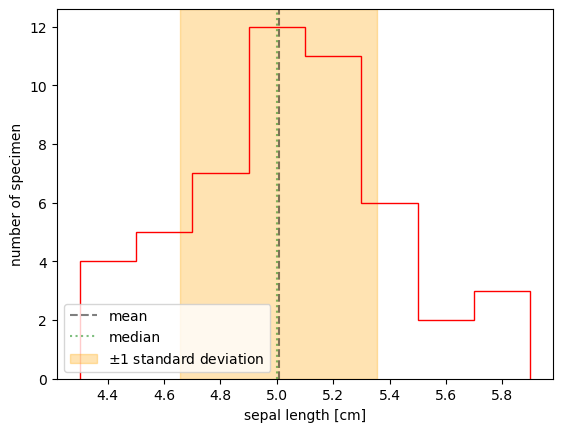

In [8]:
# (2d) & (2e)

import matplotlib as mpl
import matplotlib.pyplot as plt

mean_sl = np.mean(sl)
median_sl = np.median(sl)
std_sl = np.std(sl)

plt.hist(sl, bins=8, histtype='step', edgecolor='red', range=(4.3, 5.9))
plt.axvline(x=mean_sl, color='black', alpha=0.5, label='mean', linestyle='--')
plt.axvline(x=median_sl, color='green', alpha=0.5, label='median', linestyle=':')
plt.axvspan(xmin=(mean_sl-std_sl), xmax=(mean_sl+std_sl), alpha=0.3, color='orange', label='$\pm 1$ standard deviation')
plt.legend()
plt.xlabel('sepal length [cm]')
plt.ylabel('number of specimen')

Text(0, 0.5, 'number of specimen')

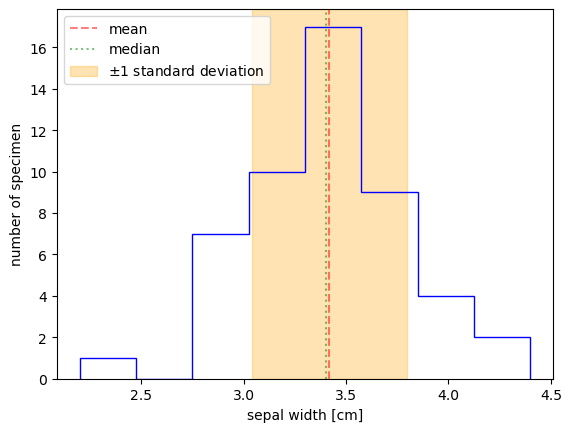

In [9]:
mean_sw = np.mean(sw)
median_sw = np.median(sw)
std_sw = np.std(sw)

plt.hist(sw, bins=8, histtype='step', edgecolor='blue', range=(2.2,4.4))
plt.axvline(x=mean_sw, color='red', alpha=0.5, label='mean', linestyle='--')
plt.axvline(x=median_sw, color='green', alpha=0.5, label='median', linestyle=':')
plt.axvspan(xmin=(mean_sw-std_sw), xmax=(mean_sw+std_sw), alpha=0.3, color='orange', label='$\pm 1$ standard deviation')
plt.legend()
plt.xlabel('sepal width [cm]')
plt.ylabel('number of specimen')

Text(0, 0.5, 'number of specimen')

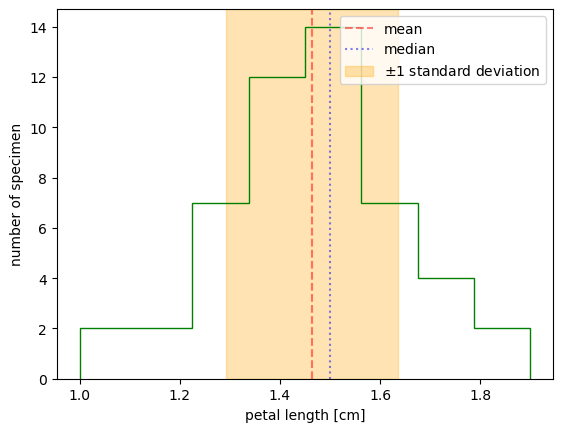

In [10]:
mean_pel = np.mean(pel)
median_pel = np.median(pel)
std_pel = np.std(pel)

plt.hist(pel, bins=8, histtype='step', edgecolor='green')
plt.axvline(x=mean_pel, color='red', alpha=0.5, label='mean', linestyle='--')
plt.axvline(x=median_pel, color='blue', alpha=0.5, label='median', linestyle=':')
plt.axvspan(xmin=(mean_pel-std_pel), xmax=(mean_pel+std_pel), alpha=0.3, color='orange', label='$\pm 1$ standard deviation')
plt.legend()
plt.xlabel('petal length [cm]')
plt.ylabel('number of specimen')

Text(0, 0.5, 'number of specimen')

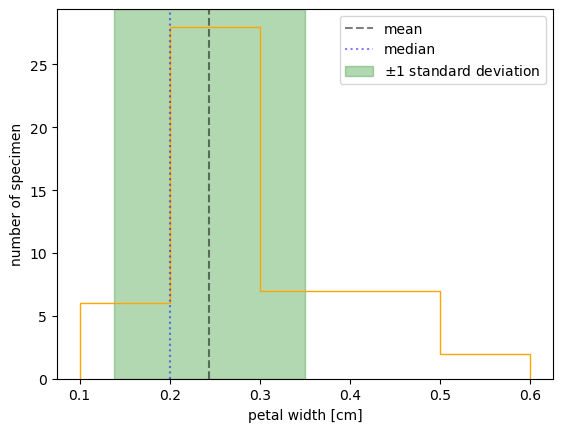

In [11]:
mean_pw = np.mean(pw)
median_pw = np.median(pw)
std_pw = np.std(pw)

plt.hist(pw, bins=5, histtype='step', edgecolor='orange')
plt.axvline(x=mean_pw, color='black', alpha=0.5, label='mean', linestyle='--')
plt.axvline(x=median_pw, color='blue', alpha=0.5, label='median', linestyle=':')
plt.axvspan(xmin=(mean_pw-std_pw), xmax=(mean_pw+std_pw), alpha=0.3, color='green', label='$\pm 1$ standard deviation')
plt.legend()
plt.xlabel('petal width [cm]')
plt.ylabel('number of specimen')